# Gamma sampled Wiener processs
Suppose we want to construct a Wiener process

<img src="https://latex.codecogs.com/svg.image?\color[rgb]{0.36,&space;0.54,&space;0.66}&space;B_{\tilde&space;t}&space;=&space;\mu&space;\tilde&space;t&plus;\sigma&space;W_{\tilde&space;t}" title="\color[rgb]{0.36, 0.54, 0.66} B_{\tilde t} = \mu \tilde t+\sigma W_{\tilde t}" />

where any given time interval follows the gamma distribution,

<img src="https://latex.codecogs.com/svg.image?\color[rgb]{0.36,0.54,0.66}\delta\tilde&space;t&space;\sim&space;\Gamma(\alpha(\delta&space;t),\beta)" title="\color[rgb]{0.36,0.54,0.66}\delta\tilde t \sim \Gamma(\alpha(\delta t),\beta)" />

This is to say, we are sampling the Wiener process according to a [gamma process](https://en.wikipedia.org/wiki/Gamma_process).

We first implement the gamma process by subclassing `Process()` and using `gamma.rvs()` from `scipy.stats`

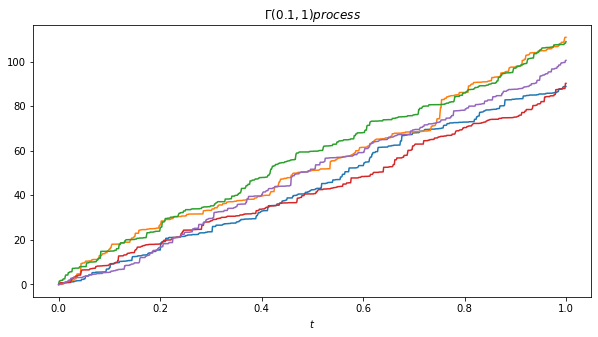

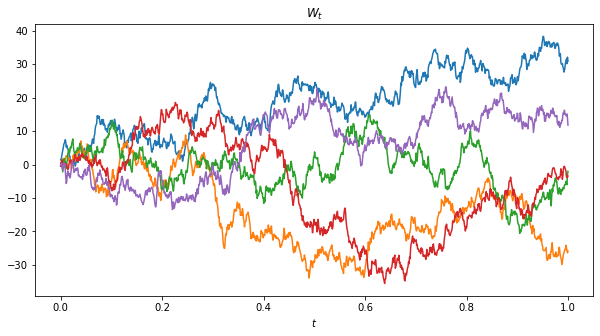

In [45]:
from price_process.process import *
from scipy.stats import gamma
import numpy as np
import statsmodels.api as sm


class Gamma(Process):
    def __init__(self, alpha, beta, size, initial=0, T=1):
        super().__init__(size, initial=initial, T=T)
        self.alpha, self.beta = alpha, beta
        self.rvs = gamma.rvs(alpha, size=self.size, scale=1/self.beta)
        self.process = np.cumsum(self.rvs, axis=0)


shape = [1000, 5]
Gamma(.1, 1, shape).plot(r"$\Gamma(0.1, 1) process$")
Gaussian(shape).plot(r"$W_t$")

Doing the resampling, and converting to an exponential process,

<img src="https://latex.codecogs.com/svg.image?\color[rgb]{0.36,0.54,0.66}P_t&space;\sim&space;P_0e^{B_{\tilde&space;t}}" title="\color[rgb]{0.36,0.54,0.66}P_t \sim P_0e^{B_{\tilde t}}" />

where the LHS and RHS are equivalent upto interpolation (which is needed due to discretization error).

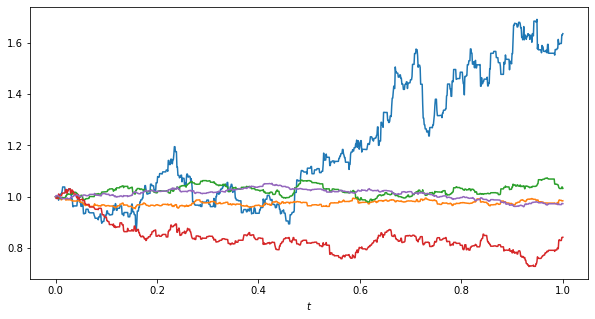

In [46]:
wiener = Gaussian(shape).resample(Gamma(.3, 1, shape).process)
wiener.to_geometric(0, 0.05).plot()

We can also take a look at the returns

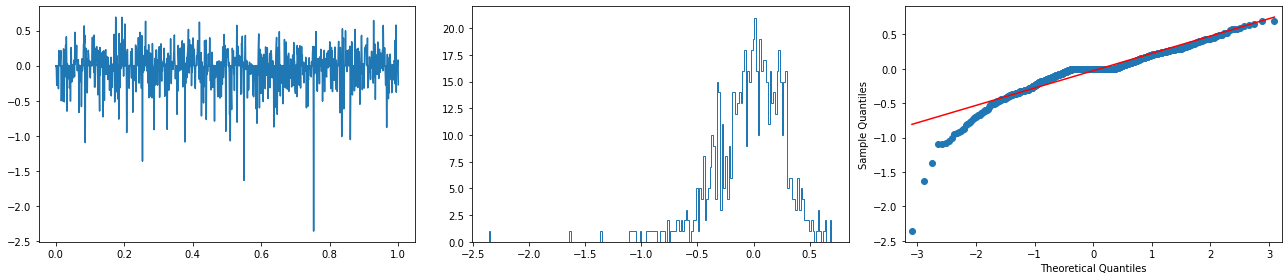

In [72]:
wiener = Gaussian(shape).resample(Gamma(2, 0.3, shape).process)
returns = wiener.to_geometric(0., 0.02).returns()
log_returns = np.log(1+returns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))
ax1.plot(wiener.t, log_returns)
ax2.hist(log_returns[log_returns<np.inf][log_returns!=0], bins=200, histtype='step')
sm.qqplot(log_returns, line='r', ax=ax3);
fig.tight_layout()